In [1]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt

In [2]:
def Canny_detector(img, weak_th=None, strong_th=None):
   
    # Conversion of image to grayscale
    if len(img.shape) == 3:  # Ensure input image is grayscale
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Noise reduction step
    img = cv2.GaussianBlur(img, (5, 5), 1.4)

    # Calculating the gradients
    gx = cv2.Sobel(np.float32(img), cv2.CV_64F, 1, 0, 3)
    gy = cv2.Sobel(np.float32(img), cv2.CV_64F, 0, 1, 3)

    # Conversion of Cartesian coordinates to polar
    mag, ang = cv2.cartToPolar(gx, gy, angleInDegrees=True)

    # Setting default thresholds if not provided
    mag_max = np.max(mag)
    if weak_th is None:
        weak_th = mag_max * 0.05
    if strong_th is None:
        strong_th = mag_max * 0.5

    # Double thresholding step
    weak_ids = mag < weak_th
    strong_ids = mag > strong_th
    ids = np.zeros_like(img)
    ids[strong_ids] = 255  # Strong edges
    ids[np.logical_and(mag <= strong_th, mag >= weak_th)] = 50  # Weak edges

    # Non-maximum suppression step
    for i in range(1, img.shape[0] - 1):
        for j in range(1, img.shape[1] - 1):
            if ids[i, j] == 50:  # Weak edge
                if np.any(ids[i - 1:i + 2, j - 1:j + 2] == 255):
                    ids[i, j] = 255

    return ids


In [3]:
def calculate_image_area(img):
   
    # Get the dimensions of the image
    height, width = img.shape[:2]

    # Calculate the area by multiplying width and height
    area = width * height

    return area


In [4]:
def find_edge_area(edge_img):
  
    # Counting non-zero pixels (edges)
    area = np.count_nonzero(edge_img)
    return area


In [5]:
def find_non_detected_edge_area(edge_img):
   
    # Total area of the image
    total_area = edge_img.shape[0] * edge_img.shape[1]

    # Area of detected edges
    edge_area = np.count_nonzero(edge_img)

    # Area of non-detected edges (background)
    non_detected_edge_area = total_area - edge_area

    return non_detected_edge_area


In [19]:
frame = cv2.imread('Image_Whole_Area/02_04.JPG')
edge_image = Canny_detector(frame)


In [20]:
edge_area = find_edge_area(edge_image)
non_detected_edge_area = find_non_detected_edge_area(edge_image)
image_area = calculate_image_area(frame)

print("Area of the input image:", image_area)
print("Area of detected edges:", edge_area)
print("Area of non-detected edges (background):", non_detected_edge_area)

Area of the input image: 12764466
Area of detected edges: 2985806
Area of non-detected edges (background): 9778660


<Figure size 640x480 with 0 Axes>

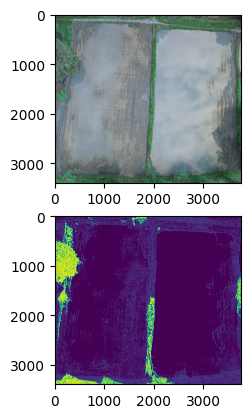

In [21]:
# Displaying the input and output image 

plt.figure() 
f, plots = plt.subplots(2, 1) 
plots[0].imshow(frame) 
plots[1].imshow(edge_image) 


In [22]:
constant = 2175
actual_area=non_detected_edge_area/constant
print(actual_area)

4495.935632183908


In [21]:
#     model area               actual area
    
# 01-5902.649195402299
# 02-3496.6979310344827
# 03-3687.32183908046
# 04-4495.935632183908
